In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
# Load the dataset
df = pd.read_csv('predictive_maintenance.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())

Dataset loaded successfully!
Shape: (10000, 9)

First 5 rows:
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  
0                    1551         42.8                0       0  
1                    1408         46.3                3       0  
2                    1498         49.4                5       0  
3                    1433         39.5                7       0  
4                    1408         40.0                9       0  

Data types:
UDI                          int64
Product ID                  object
Type                      

In [3]:
# Drop UDI and Product ID columns as they are identifiers
df = df.drop(['UDI', 'Product ID'], axis=1)

In [4]:
# ii. Perform EDA and visualizations
print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# Basic statistics
print("\n1. Basic Statistics:")
print(df.describe())


EXPLORATORY DATA ANALYSIS

1. Basic Statistics:
       Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         10000.000000             10000.000000            10000.000000   
mean            300.004930               310.005560             1538.776100   
std               2.000259                 1.483734              179.284096   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.800000             1423.000000   
50%             300.100000               310.100000             1503.000000   
75%             301.500000               311.100000             1612.000000   
max             304.500000               313.800000             2886.000000   

        Torque [Nm]  Tool wear [min]        Target  
count  10000.000000     10000.000000  10000.000000  
mean      39.986910       107.951000      0.033900  
std        9.968934        63.654147      0.180981  
min        3.800000        

In [5]:
# Check class distribution
print("\n2. Target Variable Distribution:")
target_dist = df['Target'].value_counts()
print(target_dist)
print(f"\nFailure Rate: {target_dist[1]/len(df)*100:.2f}%")


2. Target Variable Distribution:
Target
0    9661
1     339
Name: count, dtype: int64

Failure Rate: 3.39%


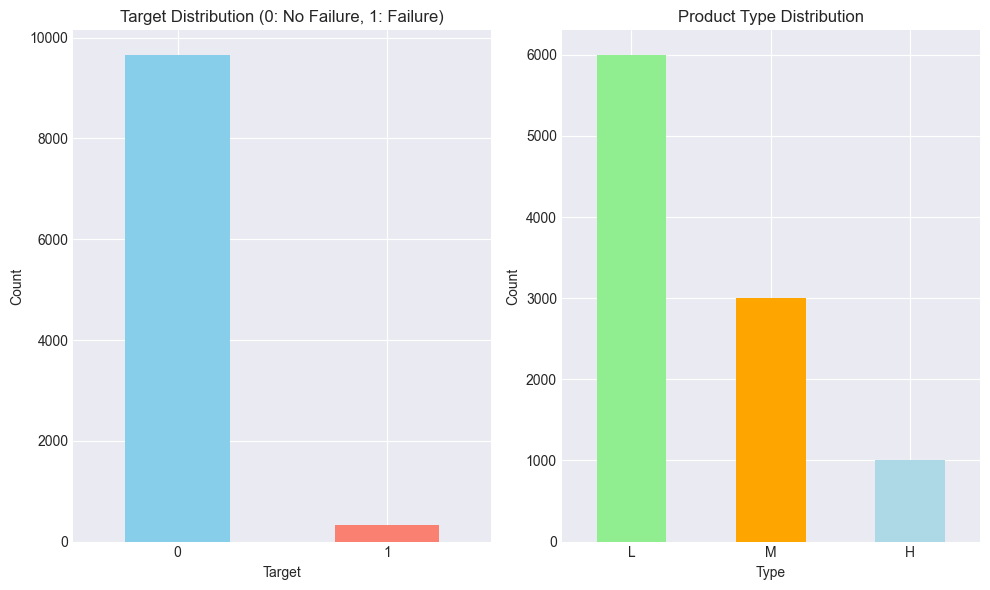

In [6]:
# Visualize target distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df['Target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Target Distribution (0: No Failure, 1: Failure)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
df['Type'].value_counts().plot(kind='bar', color=['lightgreen', 'orange', 'lightblue'])
plt.title('Product Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [7]:
# Convert Type to categorical codes for correlation analysis
df_encoded = df.copy()
df_encoded['Type'] = df_encoded['Type'].map({'L': 0, 'M': 1, 'H': 2})

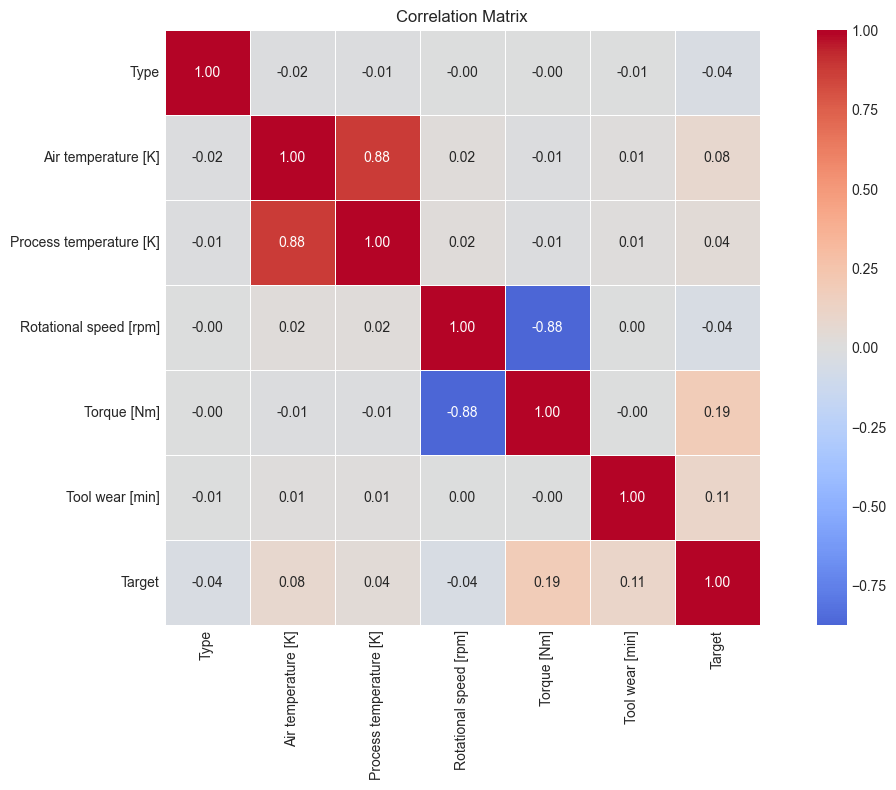

In [8]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', 
            linewidths=0.5, square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

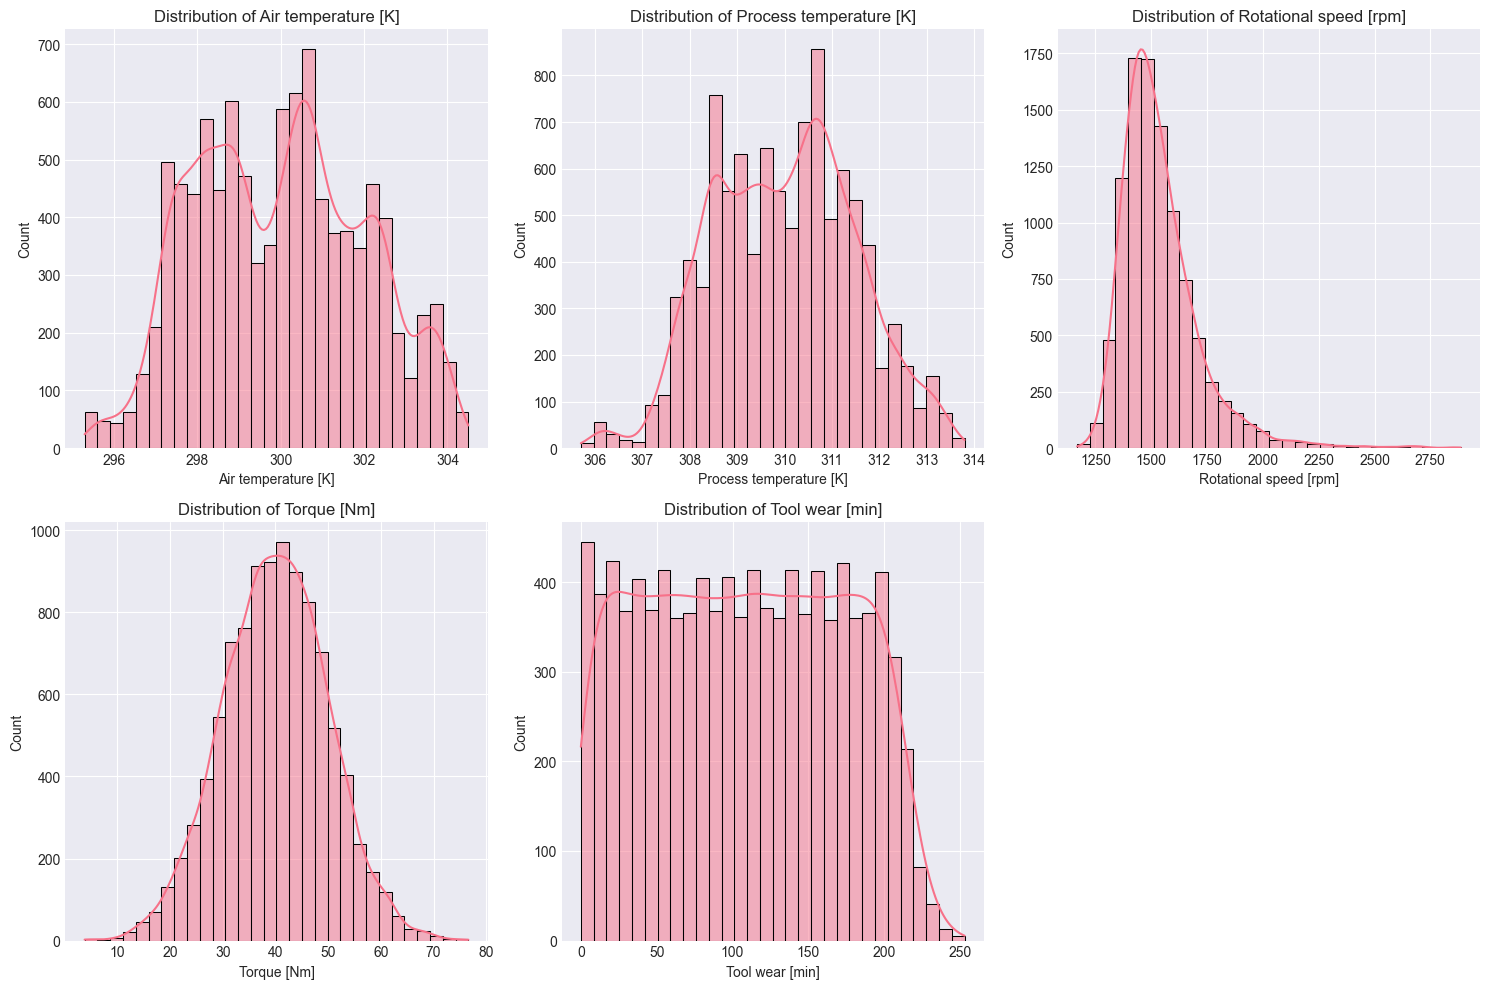

In [9]:
# Distribution of numerical features
numerical_cols = ['Air temperature [K]', 'Process temperature [K]', 
                  'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()


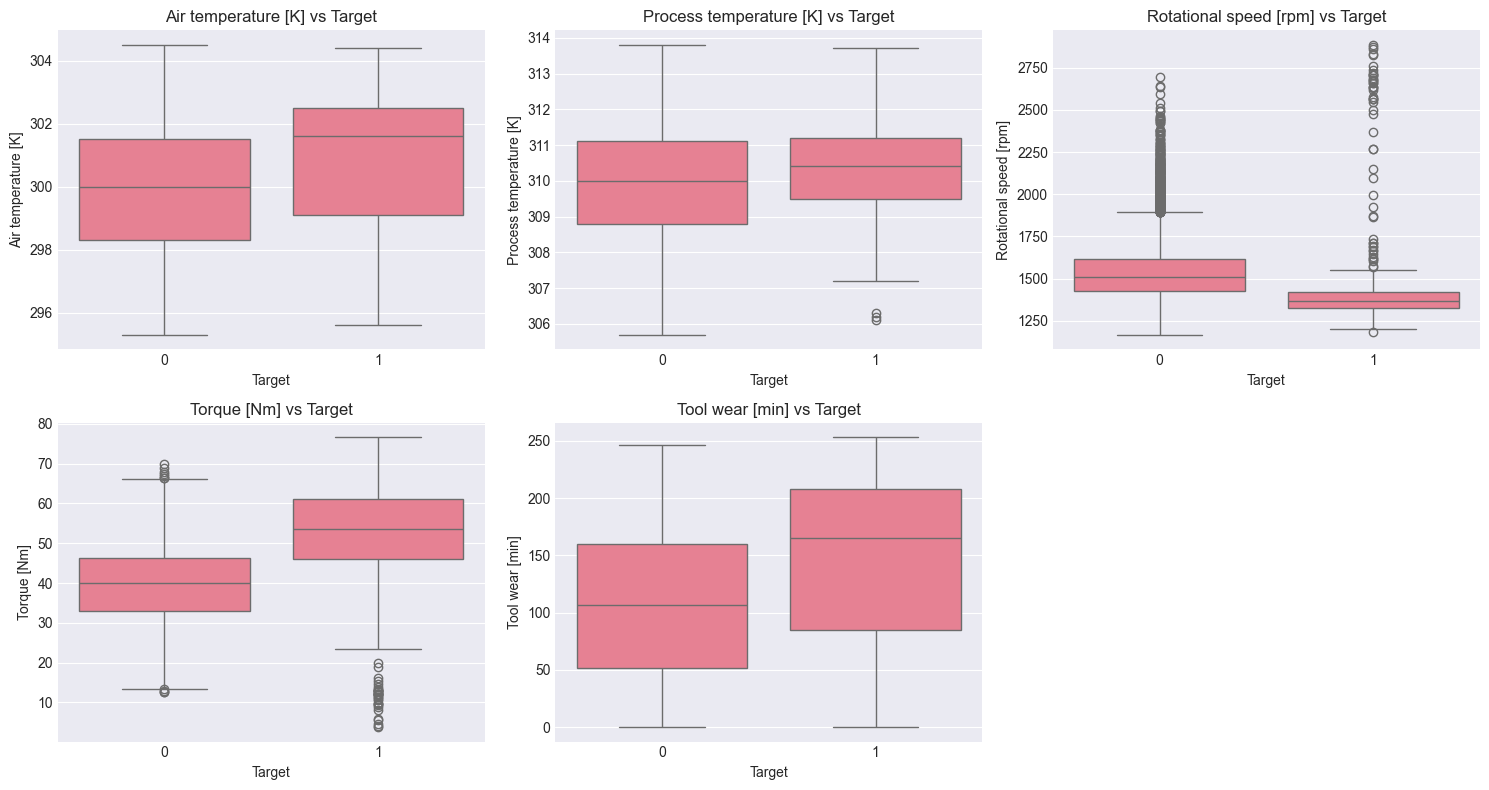

In [10]:
# Boxplots for numerical features
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='Target', y=col)
    plt.title(f'{col} vs Target')
plt.tight_layout()
plt.show()

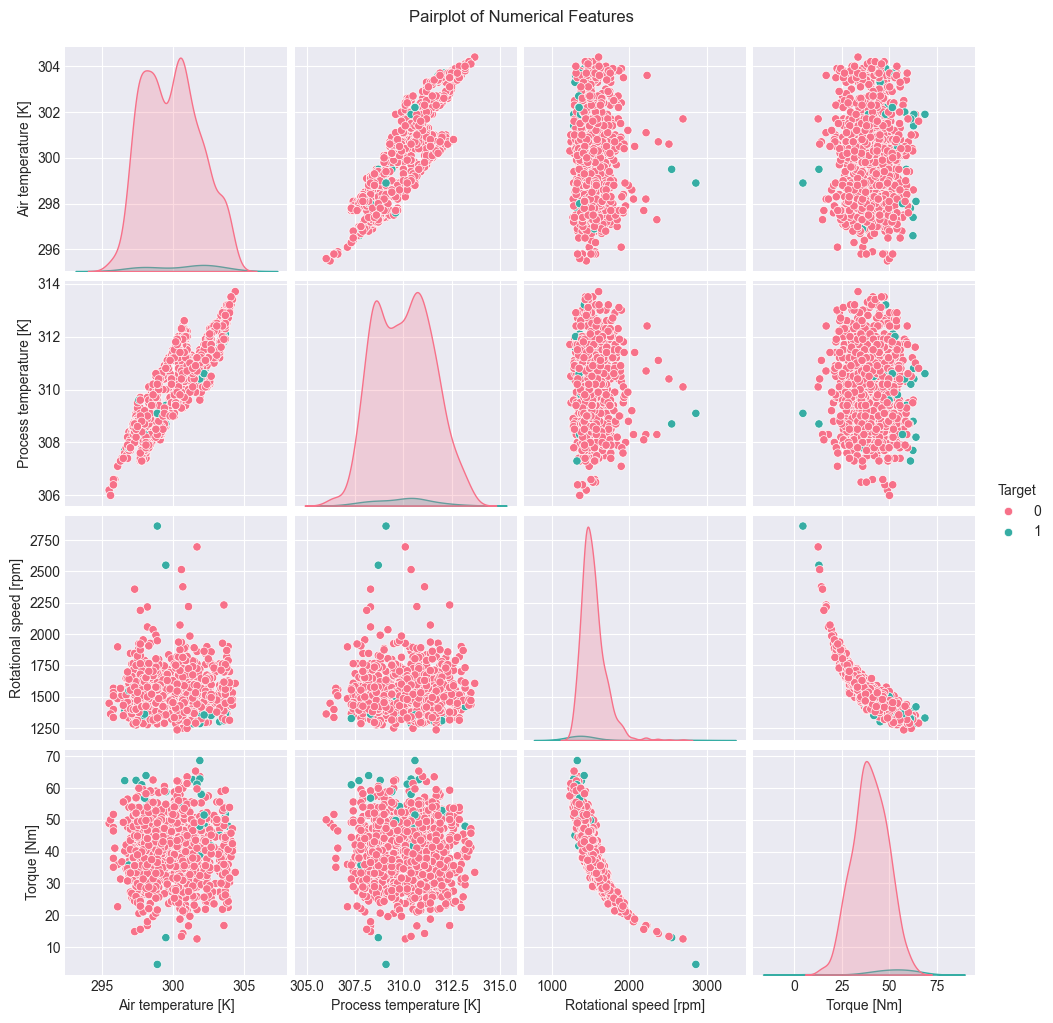

In [11]:
# Pairplot for selected features
sample_df = df.sample(min(1000, len(df)), random_state=42)
sns.pairplot(sample_df[['Air temperature [K]', 'Process temperature [K]', 
                       'Rotational speed [rpm]', 'Torque [Nm]', 'Target']],
             hue='Target', palette='husl', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

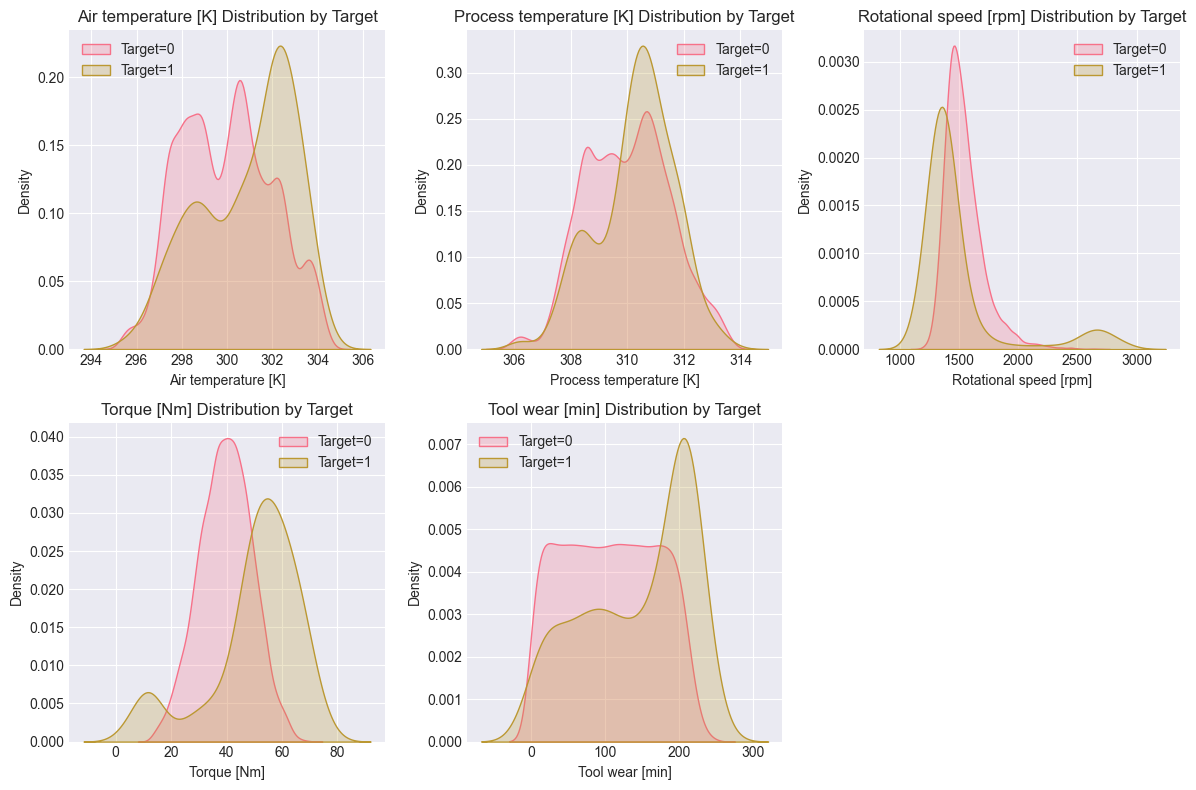

In [12]:
# Check relationships with target
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    for target_val in [0, 1]:
        subset = df[df['Target'] == target_val]
        sns.kdeplot(data=subset[col], label=f'Target={target_val}', fill=True)
    plt.title(f'{col} Distribution by Target')
    plt.xlabel(col)
    plt.legend()
plt.tight_layout()
plt.show()

(array([0, 1, 2]), [Text(0, 0, 'H'), Text(1, 0, 'L'), Text(2, 0, 'M')])

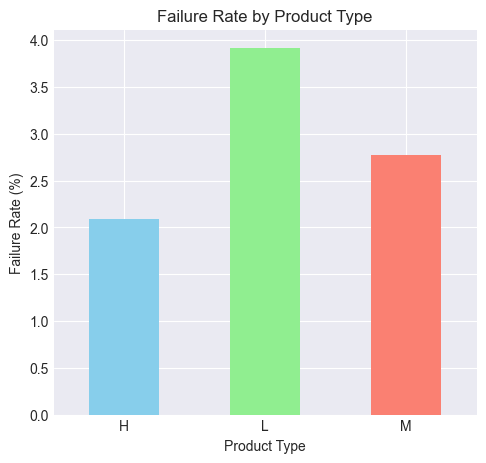

In [13]:
# Categorical analysis
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
failure_by_type = df.groupby('Type')['Target'].mean() * 100
failure_by_type.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Failure Rate by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Failure Rate (%)')
plt.xticks(rotation=0)

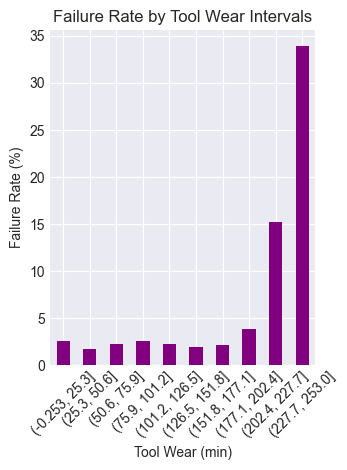

In [14]:
plt.subplot(1, 2, 2)
tool_wear_vs_failure = df.groupby(pd.cut(df['Tool wear [min]'], bins=10))['Target'].mean() * 100
tool_wear_vs_failure.plot(kind='bar', color='purple')
plt.title('Failure Rate by Tool Wear Intervals')
plt.xlabel('Tool Wear (min)')
plt.ylabel('Failure Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


SKEWNESS ANALYSIS
Air temperature [K]: Skewness = 0.1143
Process temperature [K]: Skewness = 0.0150
Rotational speed [rpm]: Skewness = 1.9932
Torque [Nm]: Skewness = -0.0095
Tool wear [min]: Skewness = 0.0273


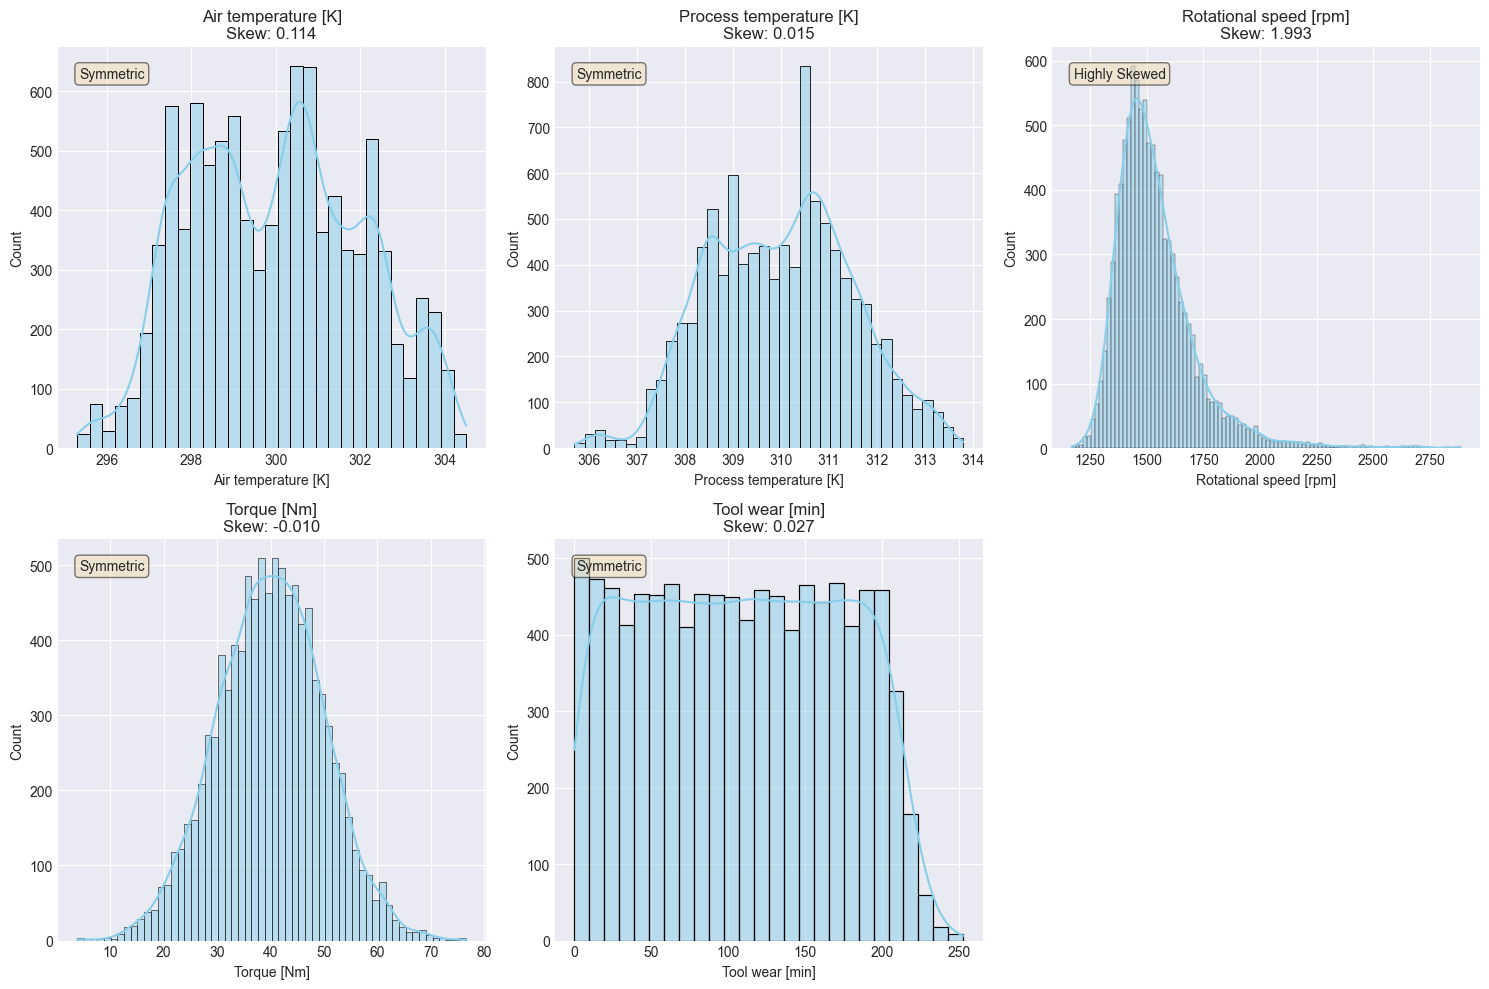

In [15]:
# iii. Check distributions/skewness and transform if required

print("\n" + "="*50)
print("SKEWNESS ANALYSIS")
print("="*50)

# Calculate skewness
skewness_results = {}
for col in numerical_cols:
    skew_val = df[col].skew()
    skewness_results[col] = skew_val
    print(f"{col}: Skewness = {skew_val:.4f}")

# Visualize skewness
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    # Original distribution
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{col}\nSkew: {skewness_results[col]:.3f}')
    
    # Add skewness text
    skew_text = 'Symmetric' if abs(skewness_results[col]) < 0.5 else \
                'Moderately Skewed' if abs(skewness_results[col]) < 1 else \
                'Highly Skewed'
    axes[i].text(0.05, 0.95, skew_text, transform=axes[i].transAxes, 
                fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # Remove empty subplot
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Checking for transformation requirements...

Transforming Rotational speed [rpm] (skewness: 1.993)...
After transformation: Skewness = 0.002


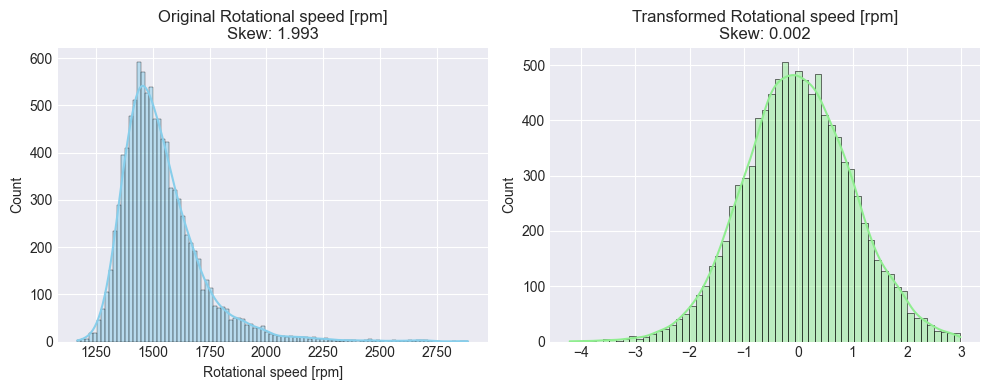

In [16]:
# Check for transformations

print("\nChecking for transformation requirements...")

# Apply transformations to highly skewed features
from sklearn.preprocessing import PowerTransformer

# Create a copy for transformations
df_transformed = df.copy()

# Initialize PowerTransformer for highly skewed features
pt = PowerTransformer(method='yeo-johnson')

# Apply transformations only if needed
for col in numerical_cols:
    if abs(skewness_results[col]) > 0.5:  # Threshold for transformation
        print(f"\nTransforming {col} (skewness: {skewness_results[col]:.3f})...")
        
        # Apply Yeo-Johnson transformation
        transformed_data = pt.fit_transform(df[[col]])
        df_transformed[f'{col}_transformed'] = transformed_data
        new_skew = pd.Series(transformed_data.flatten()).skew()
        print(f"After transformation: Skewness = {new_skew:.3f}")
        
        # Visualize before and after
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
        
        sns.histplot(df[col], kde=True, ax=ax1, color='skyblue')
        ax1.set_title(f'Original {col}\nSkew: {skewness_results[col]:.3f}')

        sns.histplot(transformed_data.flatten(), kde=True, ax=ax2, color='lightgreen')
        ax2.set_title(f'Transformed {col}\nSkew: {new_skew:.3f}')
        
        plt.tight_layout()
        plt.show()

In [17]:
# iv. Check/Treat outliers and do feature scaling

print("\n" + "="*50)
print("OUTLIER DETECTION AND TREATMENT")
print("="*50)

from scipy import stats

# Detect outliers using IQR method
outliers_info = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100

    outliers_info[col] = {
        'count': len(outliers),
        'percentage': outlier_percentage,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

    print(f"\n{col}:")
    print(f"  Outliers: {len(outliers)} ({outlier_percentage:.2f}%)")
    print(f"  Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")


OUTLIER DETECTION AND TREATMENT

Air temperature [K]:
  Outliers: 0 (0.00%)
  Bounds: [293.50, 306.30]

Process temperature [K]:
  Outliers: 0 (0.00%)
  Bounds: [305.35, 314.55]

Rotational speed [rpm]:
  Outliers: 418 (4.18%)
  Bounds: [1139.50, 1895.50]

Torque [Nm]:
  Outliers: 69 (0.69%)
  Bounds: [12.80, 67.20]

Tool wear [min]:
  Outliers: 0 (0.00%)
  Bounds: [-110.50, 325.50]


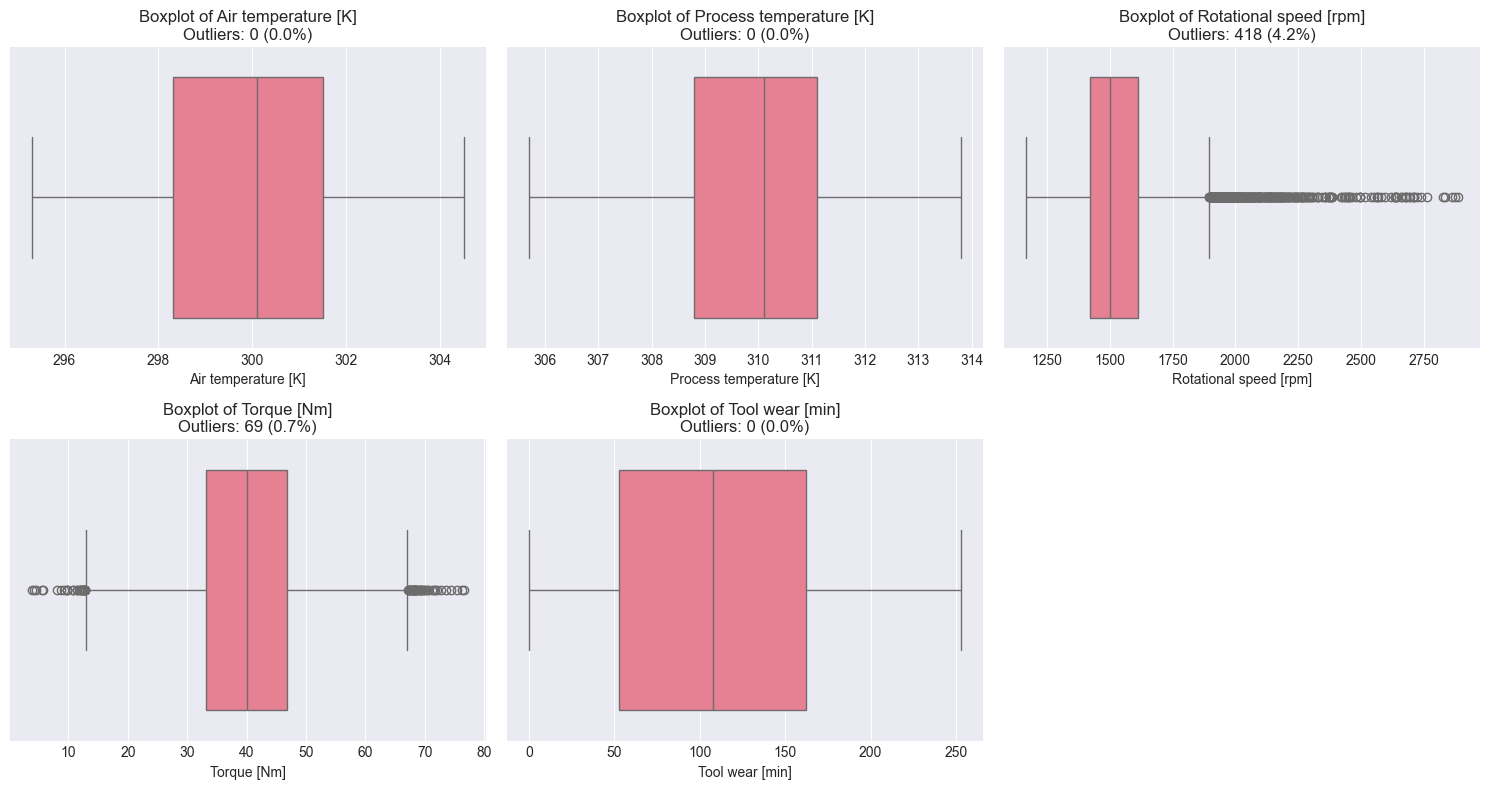

In [18]:
# Visualize outliers

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}\nOutliers: {outliers_info[col]["count"]} ({outliers_info[col]["percentage"]:.1f}%)')
plt.tight_layout()
plt.show()

In [19]:
# Check if outliers are meaningful (e.g., failures might have extreme values)

print("\nAnalyzing outliers in relation to target...")
for col in numerical_cols:
    outliers = df[(df[col] < outliers_info[col]['lower_bound']) | 
                  (df[col] > outliers_info[col]['upper_bound'])]
    failure_rate_in_outliers = outliers['Target'].mean() * 100
    
    print(f"\n{col}:")
    print(f"  Failure rate in outliers: {failure_rate_in_outliers:.2f}%")
    print(f"  Overall failure rate: {df['Target'].mean()*100:.2f}%")
    
    if failure_rate_in_outliers > df['Target'].mean() * 100 * 2:
        print(f"  → Outliers contain important failure information! Be careful with removal.")


Analyzing outliers in relation to target...

Air temperature [K]:
  Failure rate in outliers: nan%
  Overall failure rate: 3.39%

Process temperature [K]:
  Failure rate in outliers: nan%
  Overall failure rate: 3.39%

Rotational speed [rpm]:
  Failure rate in outliers: 8.37%
  Overall failure rate: 3.39%
  → Outliers contain important failure information! Be careful with removal.

Torque [Nm]:
  Failure rate in outliers: 89.86%
  Overall failure rate: 3.39%
  → Outliers contain important failure information! Be careful with removal.

Tool wear [min]:
  Failure rate in outliers: nan%
  Overall failure rate: 3.39%


In [20]:
# Based on analysis, we'll cap outliers instead of removing them
# since they might contain important failure information

print("\nCapping outliers using IQR method (winsorization)...")
df_cleaned = df.copy()

for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound,
                              np.where(df_cleaned[col] > upper_bound, upper_bound, 
                                      df_cleaned[col]))
    
    # Check remaining outliers
    remaining_outliers = df_cleaned[(df_cleaned[col] < lower_bound) | 
                                   (df_cleaned[col] > upper_bound)]
    print(f"{col}: Capped {outliers_info[col]['count'] - len(remaining_outliers)} outliers")



Capping outliers using IQR method (winsorization)...
Air temperature [K]: Capped 0 outliers
Process temperature [K]: Capped 0 outliers
Rotational speed [rpm]: Capped 418 outliers
Torque [Nm]: Capped 69 outliers
Tool wear [min]: Capped 0 outliers


In [21]:
# Feature scaling

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import re

print("\n" + "="*50)
print("FEATURE SCALING")
print("="*50)

# Prepare data for scaling
X_original = df_cleaned.drop('Target', axis=1)
y = df_cleaned['Target']

# One-hot encode categorical variable
X_encoded = pd.get_dummies(X_original, columns=['Type'], drop_first=True)

# Sanitize column names to remove characters not accepted by some models (e.g., [, ], <)
sanitized_columns = [re.sub(r'[\[\]<>]', '', col).replace(' ', '_') for col in X_encoded.columns]

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_scaled_df = pd.DataFrame(X_scaled, columns=sanitized_columns)

print("Feature scaling completed using StandardScaler")
print(f"Scaled data shape: {X_scaled_df.shape}")
print("\nScaled feature statistics:")
print(pd.DataFrame(X_scaled_df).describe().loc[['mean', 'std', 'min', 'max']])


FEATURE SCALING
Feature scaling completed using StandardScaler
Scaled data shape: (10000, 7)

Scaled feature statistics:
      Air_temperature_K  Process_temperature_K  Rotational_speed_rpm  \
mean      -9.322321e-16          -1.693934e-15          4.838796e-16   
std        1.000050e+00           1.000050e+00          1.000050e+00   
min       -2.352278e+00          -2.901986e+00         -2.433900e+00   
max        2.247357e+00           2.557486e+00          2.455507e+00   

         Torque_Nm  Tool_wear_min        Type_L        Type_M  
mean -3.325340e-16   1.051603e-16  4.760636e-17 -9.592327e-17  
std   1.000050e+00   1.000050e+00  1.000050e+00  1.000050e+00  
min  -2.741894e+00  -1.695984e+00 -1.224745e+00 -6.541861e-01  
max   2.745225e+00   2.278819e+00  8.164966e-01  1.528617e+00  


In [22]:
# import necessary libraries for modeling

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


MACHINE LEARNING MODEL DEVELOPMENT
Training set size: (8000, 7)
Test set size: (2000, 7)
Training target distribution: {0: 7729, 1: 271}
Test target distribution: {0: 1932, 1: 68}

Training Logistic Regression...
Accuracy: 0.9675
F1-Score: 0.1096
AUC-ROC: 0.8443
CV F1-Score: 0.1511 (±0.0293)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.80      0.06      0.11        68

    accuracy                           0.97      2000
   macro avg       0.88      0.53      0.55      2000
weighted avg       0.96      0.97      0.95      2000



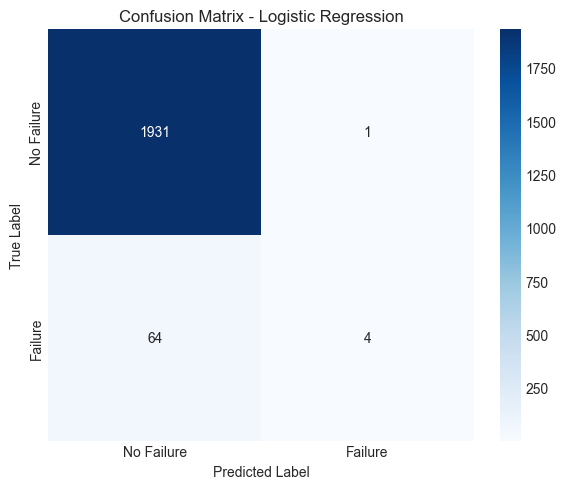


Training Decision Tree...
Accuracy: 0.9785
F1-Score: 0.6767
AUC-ROC: 0.8257
CV F1-Score: 0.6595 (±0.0124)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1932
           1       0.69      0.66      0.68        68

    accuracy                           0.98      2000
   macro avg       0.84      0.83      0.83      2000
weighted avg       0.98      0.98      0.98      2000



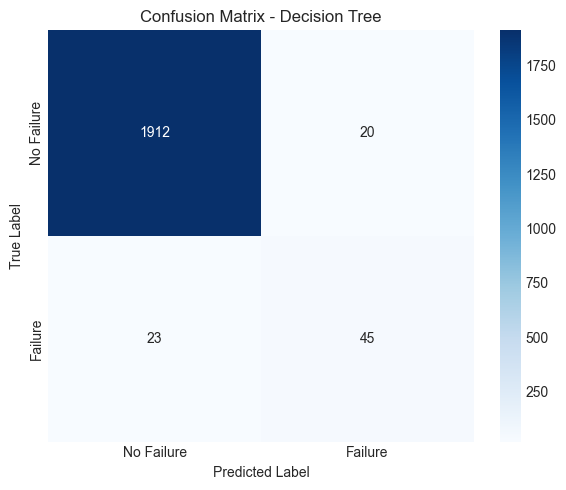


Training Random Forest...
Accuracy: 0.9835
F1-Score: 0.6972
AUC-ROC: 0.9523
CV F1-Score: 0.6943 (±0.0373)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1932
           1       0.93      0.56      0.70        68

    accuracy                           0.98      2000
   macro avg       0.96      0.78      0.84      2000
weighted avg       0.98      0.98      0.98      2000



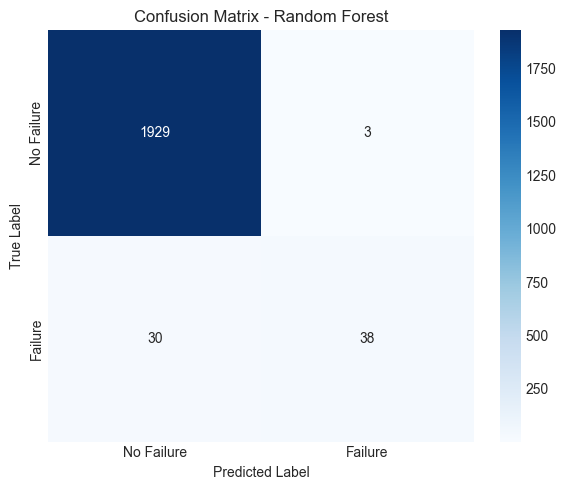


Training SVM...
Accuracy: 0.9685
F1-Score: 0.1818
AUC-ROC: 0.9476
CV F1-Score: 0.2350 (±0.0391)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.78      0.10      0.18        68

    accuracy                           0.97      2000
   macro avg       0.87      0.55      0.58      2000
weighted avg       0.96      0.97      0.96      2000



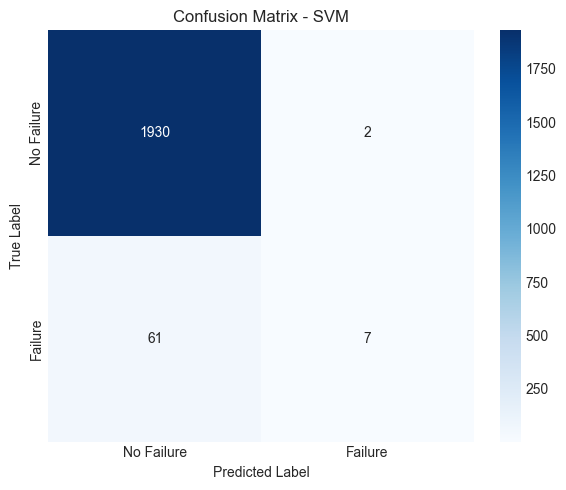


Training XGBoost...
Accuracy: 0.9845
F1-Score: 0.7480
AUC-ROC: 0.9647
CV F1-Score: 0.7089 (±0.0234)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.84      0.68      0.75        68

    accuracy                           0.98      2000
   macro avg       0.91      0.84      0.87      2000
weighted avg       0.98      0.98      0.98      2000



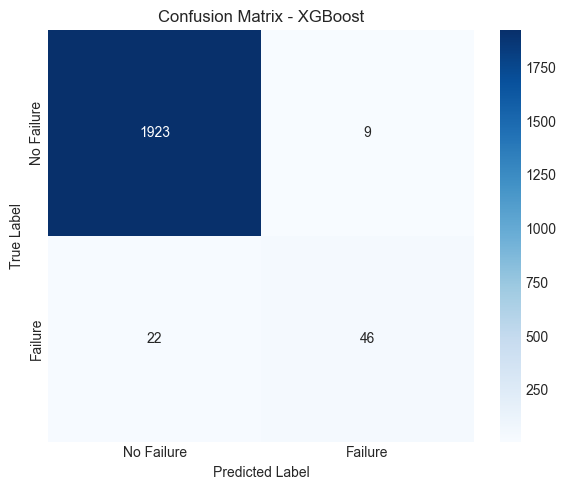


Training KNN...
Accuracy: 0.9710
F1-Score: 0.3409
AUC-ROC: 0.8118
CV F1-Score: 0.3720 (±0.0460)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1932
           1       0.75      0.22      0.34        68

    accuracy                           0.97      2000
   macro avg       0.86      0.61      0.66      2000
weighted avg       0.97      0.97      0.96      2000



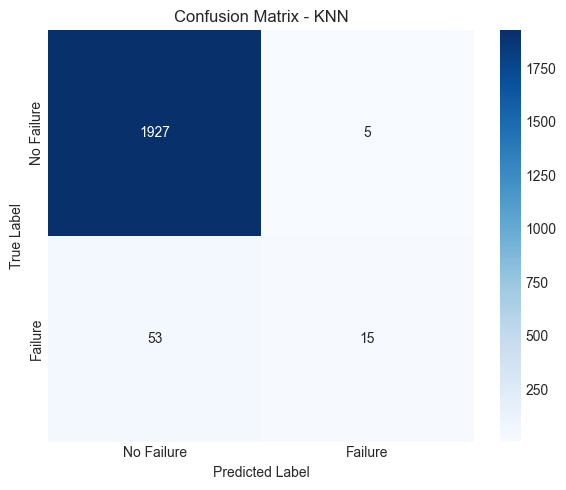


Training Gradient Boosting...
Accuracy: 0.9865
F1-Score: 0.7731
AUC-ROC: 0.9692
CV F1-Score: 0.7334 (±0.0498)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.90      0.68      0.77        68

    accuracy                           0.99      2000
   macro avg       0.95      0.84      0.88      2000
weighted avg       0.99      0.99      0.99      2000



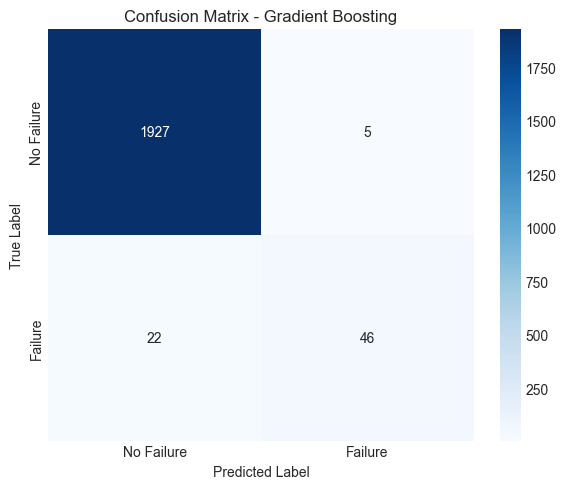


Training Naive Bayes...
Accuracy: 0.9650
F1-Score: 0.1463
AUC-ROC: 0.8894
CV F1-Score: 0.2303 (±0.0432)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.43      0.09      0.15        68

    accuracy                           0.96      2000
   macro avg       0.70      0.54      0.56      2000
weighted avg       0.95      0.96      0.95      2000



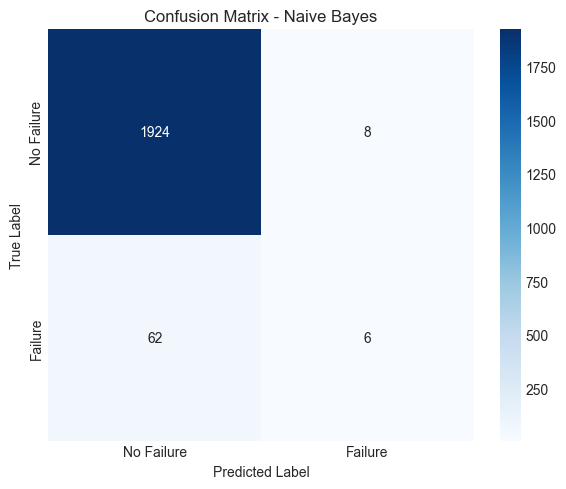

In [23]:
# v. Create ML model for classification
print("\n" + "="*50)
print("MACHINE LEARNING MODEL DEVELOPMENT")
print("="*50)


# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Training target distribution: {pd.Series(y_train).value_counts().to_dict()}")
print(f"Test target distribution: {pd.Series(y_test).value_counts().to_dict()}")

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\n{'='*60}")
    print(f"Training {name}...")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_scaled_df, y, cv=cv, scoring='f1')
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'f1_score': f1,
        'auc': auc,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    if auc:
        print(f"AUC-ROC: {auc:.4f}")
    print(f"CV F1-Score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Failure', 'Failure'],
                yticklabels=['No Failure', 'Failure'])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()




MODEL PERFORMANCE COMPARISON
              Model  Accuracy  F1-Score  AUC-ROC  CV F1-Score (Mean)  CV F1-Score (Std)
  Gradient Boosting    0.9865  0.773109 0.969241            0.733437           0.049806
            XGBoost    0.9845  0.747967 0.964659            0.708863           0.023432
      Random Forest    0.9835  0.697248 0.952335            0.694329           0.037265
      Decision Tree    0.9785  0.676692 0.825706            0.659463           0.012443
                KNN    0.9710  0.340909 0.811830            0.372009           0.046017
                SVM    0.9685  0.181818 0.947567            0.234976           0.039120
        Naive Bayes    0.9650  0.146341 0.889432            0.230349           0.043244
Logistic Regression    0.9675  0.109589 0.844279            0.151135           0.029298


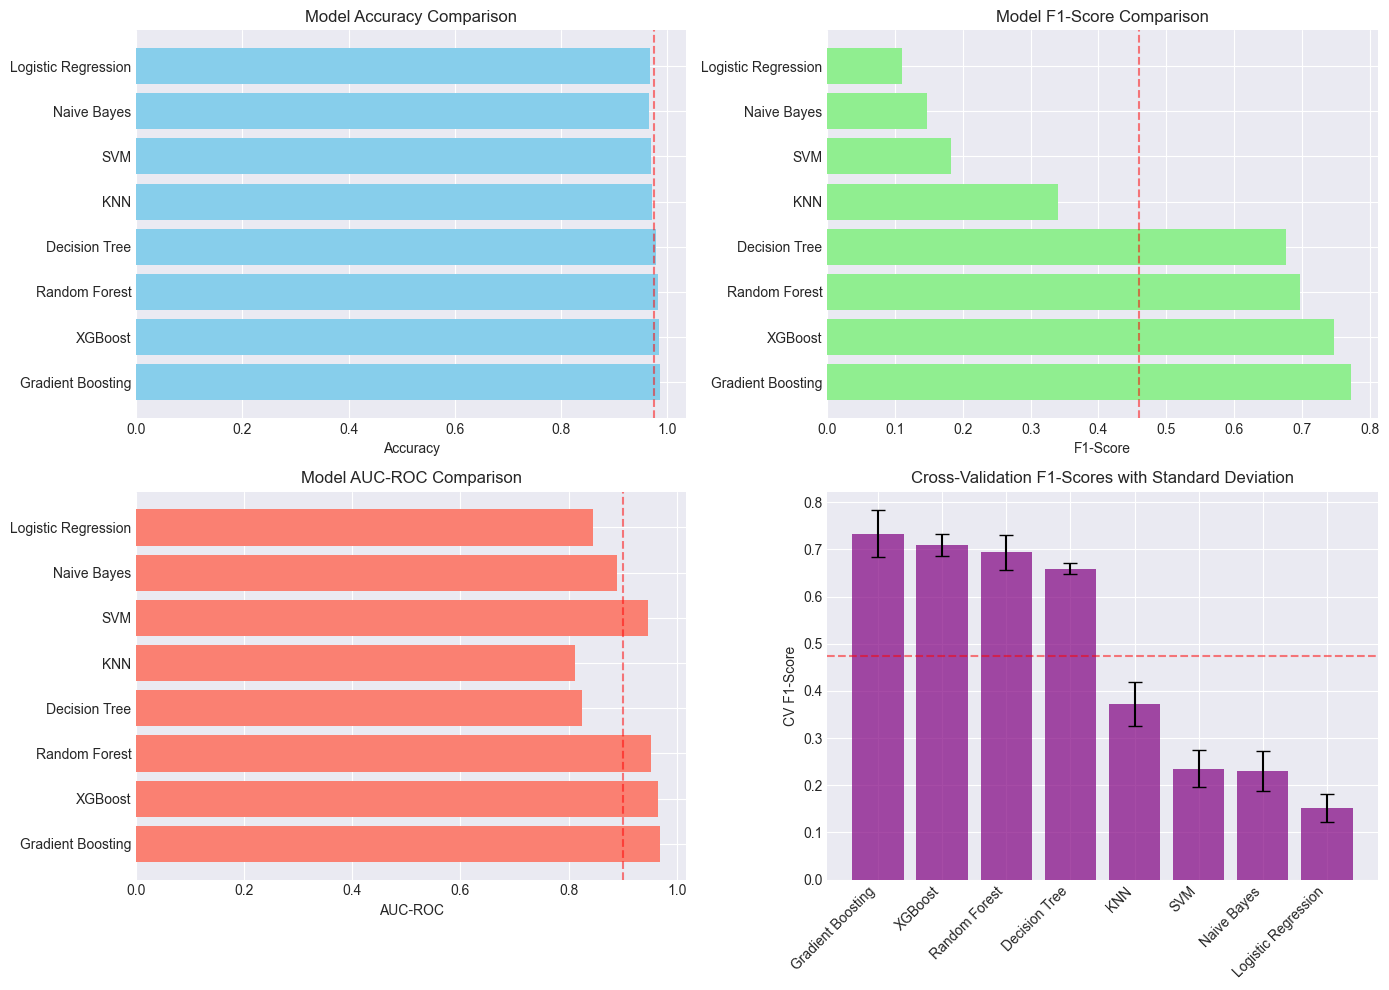


ROC CURVES COMPARISON


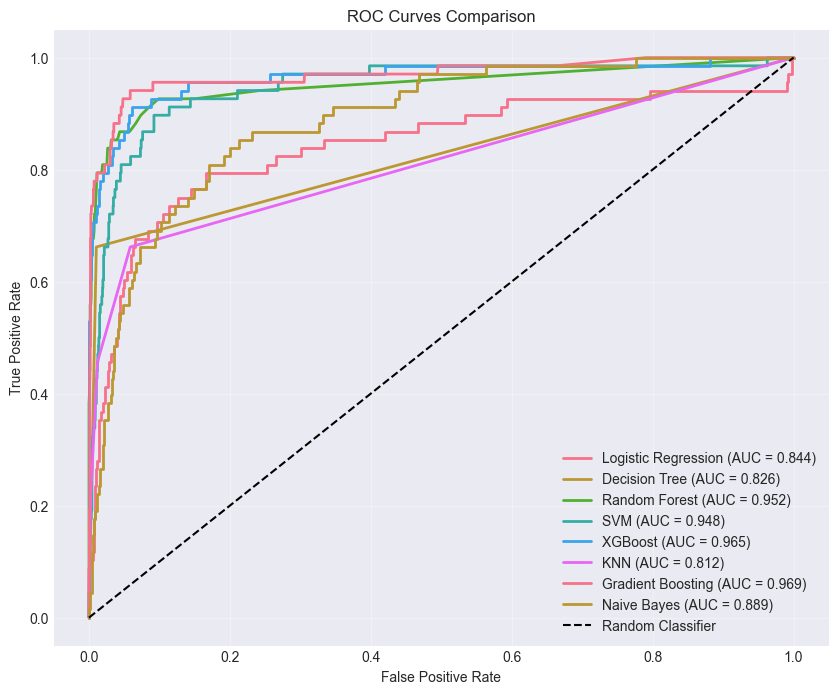

In [24]:

# Compare model performances
print("\n" + "="*60)
print("MODEL PERFORMANCE COMPARISON")
print("="*60)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results],
    'F1-Score': [results[m]['f1_score'] for m in results],
    'AUC-ROC': [results[m]['auc'] if results[m]['auc'] else np.nan for m in results],
    'CV F1-Score (Mean)': [results[m]['cv_mean'] for m in results],
    'CV F1-Score (Std)': [results[m]['cv_std'] for m in results]
}).sort_values('F1-Score', ascending=False)

print(comparison_df.to_string(index=False))

# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

# Accuracy comparison
axes[0].barh(comparison_df['Model'], comparison_df['Accuracy'], color='skyblue')
axes[0].set_xlabel('Accuracy')
axes[0].set_title('Model Accuracy Comparison')
axes[0].axvline(x=comparison_df['Accuracy'].mean(), color='red', linestyle='--', alpha=0.5)

# F1-Score comparison
axes[1].barh(comparison_df['Model'], comparison_df['F1-Score'], color='lightgreen')
axes[1].set_xlabel('F1-Score')
axes[1].set_title('Model F1-Score Comparison')
axes[1].axvline(x=comparison_df['F1-Score'].mean(), color='red', linestyle='--', alpha=0.5)

# AUC-ROC comparison (where available)
models_with_auc = comparison_df.dropna(subset=['AUC-ROC'])
axes[2].barh(models_with_auc['Model'], models_with_auc['AUC-ROC'], color='salmon')
axes[2].set_xlabel('AUC-ROC')
axes[2].set_title('Model AUC-ROC Comparison')
if len(models_with_auc) > 0:
    axes[2].axvline(x=models_with_auc['AUC-ROC'].mean(), color='red', linestyle='--', alpha=0.5)

# CV Scores comparison
x_pos = np.arange(len(comparison_df))
axes[3].bar(x_pos, comparison_df['CV F1-Score (Mean)'], 
           yerr=comparison_df['CV F1-Score (Std)'],
           capsize=5, color='purple', alpha=0.7)
axes[3].set_xticks(x_pos)
axes[3].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
axes[3].set_ylabel('CV F1-Score')
axes[3].set_title('Cross-Validation F1-Scores with Standard Deviation')
axes[3].axhline(y=comparison_df['CV F1-Score (Mean)'].mean(), color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# ROC Curves for models with probability predictions
print("\n" + "="*60)
print("ROC CURVES COMPARISON")
print("="*60)

plt.figure(figsize=(10, 8))
for name, result in results.items():
    if result['auc']:
        y_pred_proba = result['model'].predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {result["auc"]:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()


OVERFITTING ANALYSIS

Overfitting Analysis (F1-Score based):
                     train_f1   test_f1    f1_gap overfitting
Decision Tree             1.0  0.676692  0.323308        True
Random Forest             1.0  0.697248  0.302752        True
XGBoost                   1.0  0.747967  0.252033        True
KNN                  0.554404  0.340909  0.213495        True
SVM                  0.339394  0.181818  0.157576        True
Naive Bayes          0.274854  0.146341  0.128512        True
Gradient Boosting    0.848739  0.773109   0.07563       False
Logistic Regression  0.161616  0.109589  0.052027       False


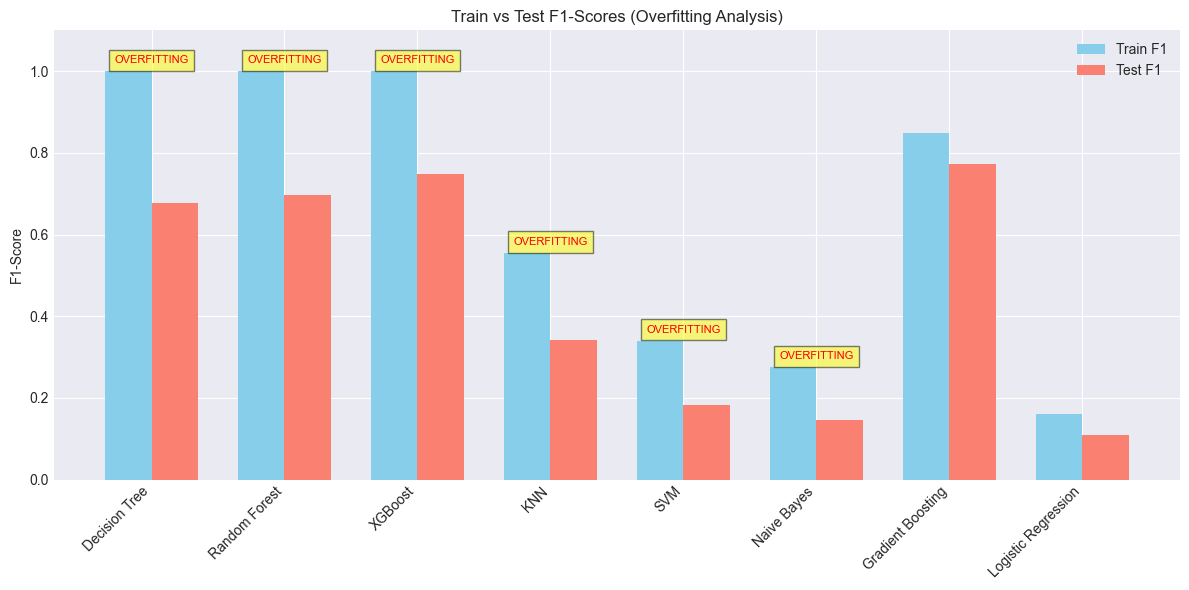


ADDRESSING OVERFITTING
Models showing overfitting: ['Decision Tree', 'Random Forest', 'XGBoost', 'KNN', 'SVM', 'Naive Bayes']

Tuning Decision Tree to reduce overfitting...
Best parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Train F1 (tuned): 0.8347
Test F1 (tuned): 0.7634
F1 gap reduction: 0.2520

Tuning Random Forest to reduce overfitting...
Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15}
Train F1 (tuned): 0.9357
Test F1 (tuned): 0.6847
F1 gap reduction: 0.0518

EVALUATING TUNED MODELS

Decision Tree (Tuned):
  Accuracy: 0.9845
  F1-Score: 0.7634
  AUC-ROC: 0.8909

Random Forest (Tuned):
  Accuracy: 0.9825
  F1-Score: 0.6847
  AUC-ROC: 0.9700


In [25]:
# vi. Check for overfitting and treat accordingly

print("\n" + "="*50)
print("OVERFITTING ANALYSIS")
print("="*50)

# Check for overfitting by comparing train and test performance
overfitting_analysis = {}
for name, result in results.items():
    model = result['model']
    
    # Train set performance
    y_train_pred = model.predict(X_train)
    train_f1 = f1_score(y_train, y_train_pred)
    
    # Test set performance
    test_f1 = result['f1_score']
    
    # Calculate overfitting gap
    f1_gap = train_f1 - test_f1
    
    overfitting_analysis[name] = {
        'train_f1': train_f1,
        'test_f1': test_f1,
        'f1_gap': f1_gap,
        'overfitting': f1_gap > 0.1  # Threshold for overfitting
    }

# Create overfitting analysis dataframe
overfitting_df = pd.DataFrame(overfitting_analysis).T.sort_values('f1_gap', ascending=False)
print("\nOverfitting Analysis (F1-Score based):")
print(overfitting_df[['train_f1', 'test_f1', 'f1_gap', 'overfitting']])

# Visualize overfitting
plt.figure(figsize=(12, 6))
x_pos = np.arange(len(overfitting_df))
width = 0.35

plt.bar(x_pos - width/2, overfitting_df['train_f1'], width, label='Train F1', color='skyblue')
plt.bar(x_pos + width/2, overfitting_df['test_f1'], width, label='Test F1', color='salmon')

# Highlight overfitting models
for i, (idx, row) in enumerate(overfitting_df.iterrows()):
    if row['overfitting']:
        plt.text(i, max(row['train_f1'], row['test_f1']) + 0.02, 
                'OVERFITTING', ha='center', fontsize=8, color='red',
                bbox=dict(facecolor='yellow', alpha=0.5))

plt.xticks(x_pos, overfitting_df.index, rotation=45, ha='right')
plt.ylabel('F1-Score')
plt.title('Train vs Test F1-Scores (Overfitting Analysis)')
plt.legend()
plt.ylim([0, 1.1])
plt.tight_layout()
plt.show()

# Address overfitting for specific models
print("\n" + "="*60)
print("ADDRESSING OVERFITTING")
print("="*60)

from sklearn.model_selection import GridSearchCV

# Let's address overfitting in Decision Tree and Random Forest
models_to_tune = {}

# Check which models show overfitting
overfitting_models = overfitting_df[overfitting_df['overfitting']].index.tolist()
print(f"Models showing overfitting: {overfitting_models}")

# Hyperparameter tuning for overfitting models
if 'Decision Tree' in overfitting_models:
    print("\nTuning Decision Tree to reduce overfitting...")
    
    # Define parameter grid
    param_grid = {
        'max_depth': [3, 5, 7, 10, 15, None],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 4, 8],
        'max_features': ['sqrt', 'log2', None]
    }
    
    # Grid search with cross-validation
    dt_tuned = GridSearchCV(
        DecisionTreeClassifier(random_state=42),
        param_grid,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring='f1',
        n_jobs=-1,
        verbose=0
    )
    
    dt_tuned.fit(X_train, y_train)
    
    # Evaluate tuned model
    y_pred_tuned = dt_tuned.predict(X_test)
    train_f1_tuned = f1_score(y_train, dt_tuned.predict(X_train))
    test_f1_tuned = f1_score(y_test, y_pred_tuned)
    
    print(f"Best parameters: {dt_tuned.best_params_}")
    print(f"Train F1 (tuned): {train_f1_tuned:.4f}")
    print(f"Test F1 (tuned): {test_f1_tuned:.4f}")
    print(f"F1 gap reduction: {(overfitting_df.loc['Decision Tree', 'f1_gap'] - (train_f1_tuned - test_f1_tuned)):.4f}")
    
    models_to_tune['Decision Tree (Tuned)'] = dt_tuned.best_estimator_

if 'Random Forest' in overfitting_models:
    print("\nTuning Random Forest to reduce overfitting...")
    
    # Define parameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }
    
    # Randomized search for efficiency
    from sklearn.model_selection import RandomizedSearchCV
    
    rf_tuned = RandomizedSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring='f1',
        n_jobs=-1,
        verbose=0,
        n_iter=20,
        random_state=42
    )
    
    rf_tuned.fit(X_train, y_train)
    
    # Evaluate tuned model
    y_pred_tuned = rf_tuned.predict(X_test)
    train_f1_tuned = f1_score(y_train, rf_tuned.predict(X_train))
    test_f1_tuned = f1_score(y_test, y_pred_tuned)
    
    print(f"Best parameters: {rf_tuned.best_params_}")
    print(f"Train F1 (tuned): {train_f1_tuned:.4f}")
    print(f"Test F1 (tuned): {test_f1_tuned:.4f}")
    print(f"F1 gap reduction: {(overfitting_df.loc['Random Forest', 'f1_gap'] - (train_f1_tuned - test_f1_tuned)):.4f}")
    
    models_to_tune['Random Forest (Tuned)'] = rf_tuned.best_estimator_

# Add tuned models to comparison
if models_to_tune:
    print("\n" + "="*60)
    print("EVALUATING TUNED MODELS")
    print("="*60)
    
    for name, model in models_to_tune.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_proba)
        
        results[name] = {
            'model': model,
            'accuracy': accuracy,
            'f1_score': f1,
            'auc': auc,
            'cv_mean': np.nan,
            'cv_std': np.nan
        }
        
        print(f"\n{name}:")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  F1-Score: {f1:.4f}")
        print(f"  AUC-ROC: {auc:.4f}")


FINAL MODEL COMPARISON

Final Model Performance Comparison:
                Model  Accuracy  F1-Score  AUC-ROC
    Gradient Boosting    0.9865  0.773109 0.969241
Decision Tree (Tuned)    0.9845  0.763359 0.890893
              XGBoost    0.9845  0.747967 0.964659
        Random Forest    0.9835  0.697248 0.952335
Random Forest (Tuned)    0.9825  0.684685 0.970048
        Decision Tree    0.9785  0.676692 0.825706
                  KNN    0.9710  0.340909 0.811830
                  SVM    0.9685  0.181818 0.947567
          Naive Bayes    0.9650  0.146341 0.889432
  Logistic Regression    0.9675  0.109589 0.844279

🏆 BEST MODEL: Gradient Boosting
   F1-Score: 0.7731
   Accuracy: 0.9865
   AUC-ROC: 0.9692

FEATURE IMPORTANCE ANALYSIS

Top 10 Most Important Features:
              feature  importance
            Torque_Nm    0.391796
        Tool_wear_min    0.176084
 Rotational_speed_rpm    0.148794
    Air_temperature_K    0.138799
Process_temperature_K    0.119051
               Type_

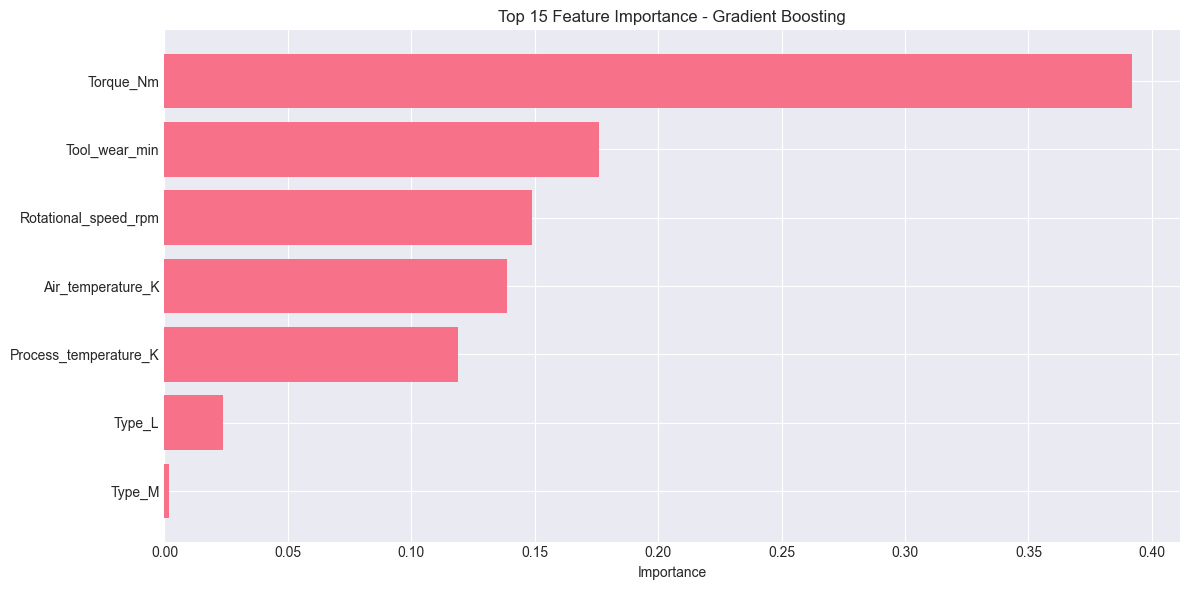


FINAL EVALUATION OF BEST MODEL

Detailed Classification Report:
              precision    recall  f1-score   support

  No Failure       0.99      1.00      0.99      1932
     Failure       0.90      0.68      0.77        68

    accuracy                           0.99      2000
   macro avg       0.95      0.84      0.88      2000
weighted avg       0.99      0.99      0.99      2000



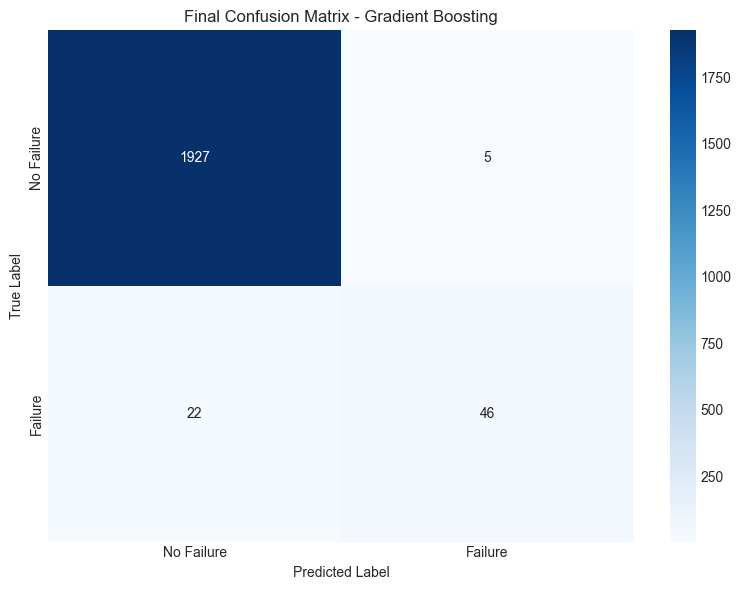

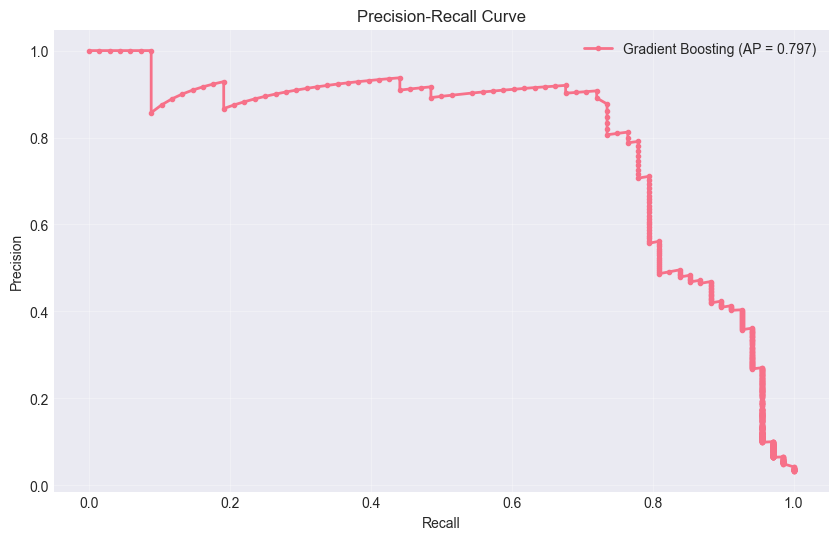


Average Precision: 0.7969

Saving the best model...
Model saved as 'best_predictive_maintenance_model.pkl'
Scaler saved as 'scaler.pkl'

ANALYSIS COMPLETE!


In [26]:
# vii. Final model comparison and selection

print("\n" + "="*60)
print("FINAL MODEL COMPARISON")
print("="*60)

# Update comparison dataframe with tuned models
final_comparison = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results],
    'F1-Score': [results[m]['f1_score'] for m in results],
    'AUC-ROC': [results[m]['auc'] if results[m]['auc'] else np.nan for m in results]
}).sort_values('F1-Score', ascending=False)

print("\nFinal Model Performance Comparison:")
print(final_comparison.to_string(index=False))

# Identify best model
best_model_name = final_comparison.iloc[0]['Model']
best_model = results[best_model_name]['model']
print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   F1-Score: {final_comparison.iloc[0]['F1-Score']:.4f}")
print(f"   Accuracy: {final_comparison.iloc[0]['Accuracy']:.4f}")
print(f"   AUC-ROC: {final_comparison.iloc[0]['AUC-ROC']:.4f}")

# Feature importance for tree-based models
print("\n" + "="*60)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*60)

# Check if best model has feature_importances_ attribute
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X_scaled_df.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10).to_string(index=False))
    
    # Visualize feature importance
    plt.figure(figsize=(12, 6))
    top_features = feature_importance.head(15)
    plt.barh(range(len(top_features)), top_features['importance'][::-1])
    plt.yticks(range(len(top_features)), top_features['feature'][::-1])
    plt.xlabel('Importance')
    plt.title(f'Top 15 Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()
elif hasattr(best_model, 'coef_'):
    # For linear models
    if len(best_model.coef_.shape) > 1:
        coef = best_model.coef_[0]
    else:
        coef = best_model.coef_
    
    feature_importance = pd.DataFrame({
        'feature': X_scaled_df.columns,
        'coefficient': coef
    }).sort_values('coefficient', key=abs, ascending=False)
    
    print("\nTop 10 Most Important Features (by coefficient magnitude):")
    print(feature_importance.head(10).to_string(index=False))
    
    # Visualize coefficients
    plt.figure(figsize=(12, 6))
    top_features = feature_importance.head(15)
    colors = ['red' if x < 0 else 'blue' for x in top_features['coefficient']]
    plt.barh(range(len(top_features)), top_features['coefficient'][::-1], 
             color=colors[::-1])
    plt.yticks(range(len(top_features)), top_features['feature'][::-1])
    plt.xlabel('Coefficient Value')
    plt.title(f'Top 15 Feature Coefficients - {best_model_name}')
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Final evaluation on best model
print("\n" + "="*60)
print("FINAL EVALUATION OF BEST MODEL")
print("="*60)

# Detailed classification report
y_pred_best = best_model.predict(X_test)
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=['No Failure', 'Failure']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Failure', 'Failure'],
            yticklabels=['No Failure', 'Failure'])
plt.title(f'Final Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Precision-Recall curve
from sklearn.metrics import precision_recall_curve, average_precision_score

if hasattr(best_model, "predict_proba"):
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    avg_precision = average_precision_score(y_test, y_pred_proba)
    
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, marker='.', linewidth=2, label=f'{best_model_name} (AP = {avg_precision:.3f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print(f"\nAverage Precision: {avg_precision:.4f}")

# Save the best model
import joblib
print("\nSaving the best model...")
joblib.dump(best_model, 'best_predictive_maintenance_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model saved as 'best_predictive_maintenance_model.pkl'")
print("Scaler saved as 'scaler.pkl'")

print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)